In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.MNIST(root = "data", train = True, download= True, transform= ToTensor())

In [3]:
X_train = train_data.data.cpu().detach().numpy()
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], -1) # shape (n, 784)
y = train_data.targets.cpu().detach().numpy() # shape (n, )

(60000, 28, 28)


In [5]:
# Take samples of class 2
import matplotlib.pyplot as plt
X = X_train[y == 8]
X = X.astype(float)
print(X.shape)

(5851, 784)


In [6]:
x= X[0]
np.sum(x / 255)

np.float64(106.29803921568626)

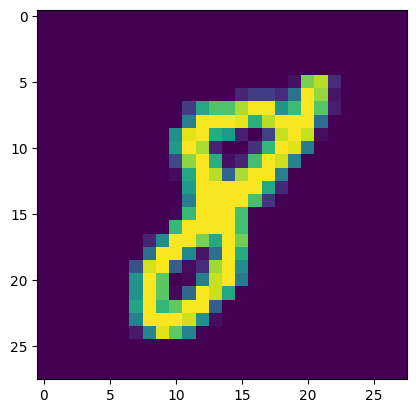

In [7]:
plt.imshow(x.reshape(28, 28))

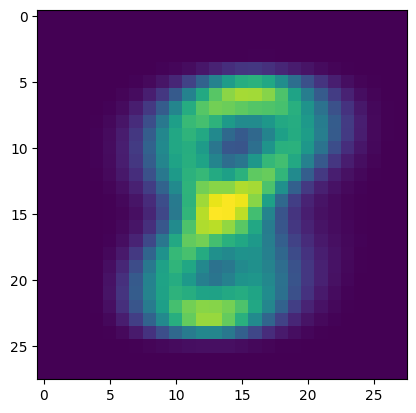

In [9]:
vmu = np.mean(X[:4000], axis = 0)
plt.imshow(vmu.reshape(28, 28))

(5851, 784)
(784,)
(784, 784)


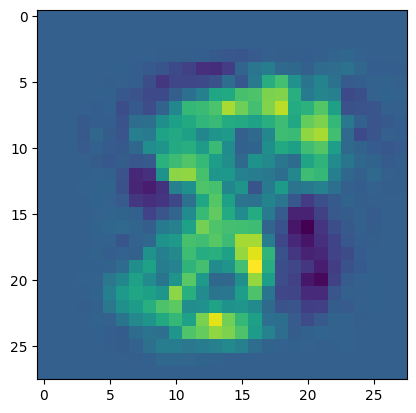

In [13]:
# Statistics
import numpy as np
print(X.shape)
vmu = np.mean(X, axis = 0)
print(vmu.shape)
cov = (X - vmu).T @ (X  -vmu)/ X.shape[0]
print(cov.shape)
# Generate a new sample
z = np.random.multivariate_normal(mean = vmu, cov = cov, size = 1)
plt.imshow(z.reshape(28, 28))



In [113]:
z_ = np.maximum(z, 0)
z_ 

array([[3.68830821e-08, 6.67411302e-06, 6.52481869e-06, 1.23600410e-06,
        6.51161921e-06, 0.00000000e+00, 2.79824739e-06, 5.84810957e-06,
        1.30765531e-06, 0.00000000e+00, 0.00000000e+00, 2.59561746e-06,
        0.00000000e+00, 0.00000000e+00, 1.07088954e-05, 0.00000000e+00,
        4.38839763e-06, 2.84747204e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.43733468e-06, 0.00000000e+00,
        6.15429150e-06, 0.00000000e+00, 0.00000000e+00, 1.17966455e-06,
        3.95696193e-06, 1.54631731e-06, 5.69946561e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.21405622e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.25634771e-06,
        3.69553269e-06, 2.15534523e-06, 6.27987590e-06, 0.00000000e+00,
        3.79000316e-06, 5.19083703e-06, 0.00000000e+00, 6.06877560e-06,
        4.87227922e-07, 0.00000000e+00, 5.71769322e-06, 3.92700713e-06,
        1.73395569e-06, 0.00000000e+00, 0.00000000e+00, 0.000000

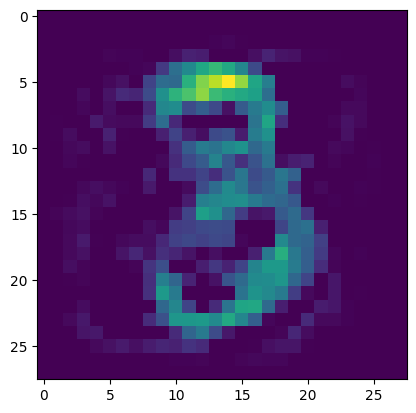

In [114]:
plt.imshow(z_.reshape(28, 28))

In [115]:
vmu

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

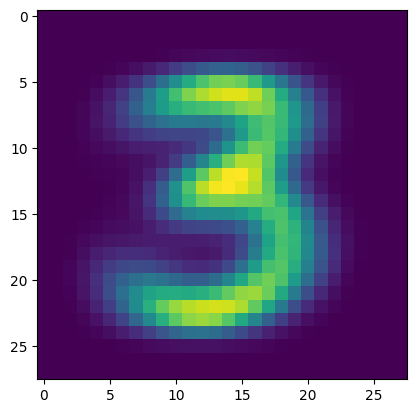

In [116]:
plt.imshow(vmu.reshape(28, 28))

In [14]:
np.trace(cov)

np.float64(2964863.4326501675)

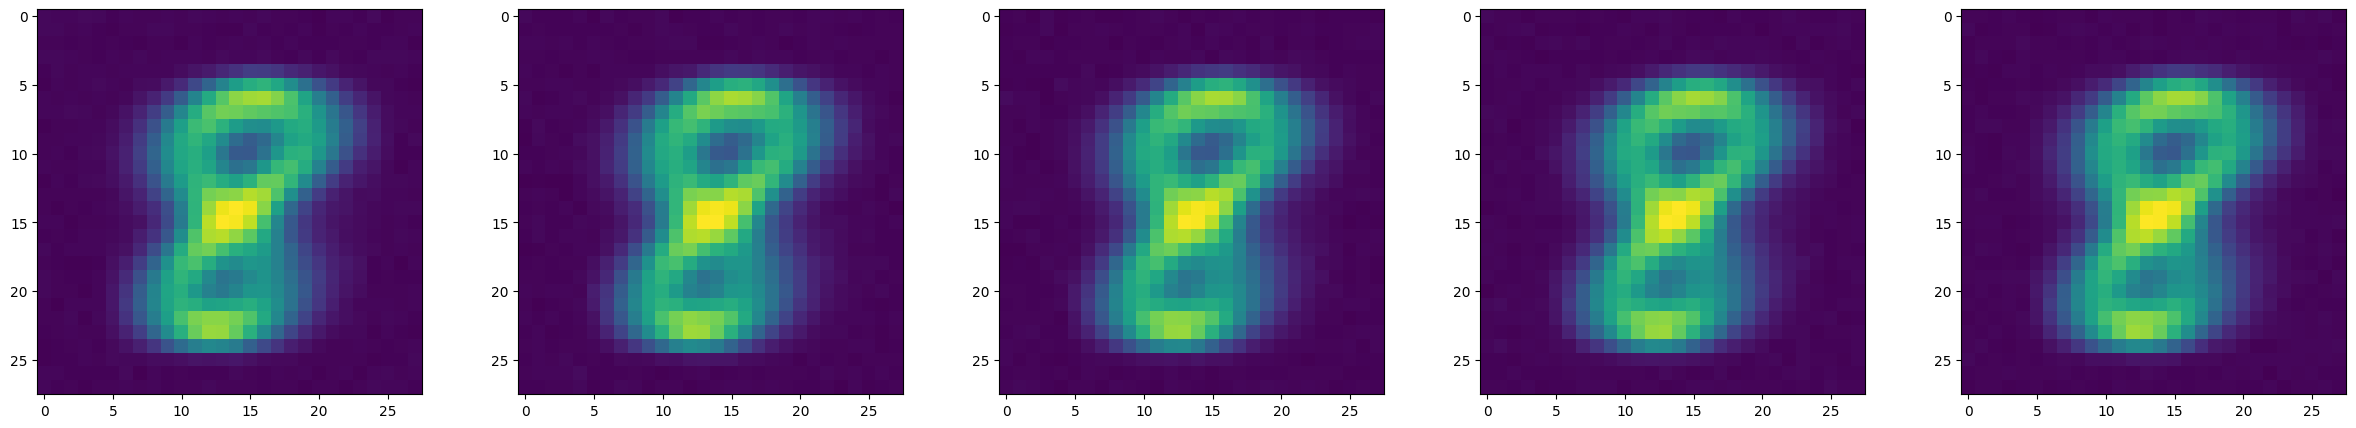

In [12]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = np.eye(len(vmu)), size = 1)
    #z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


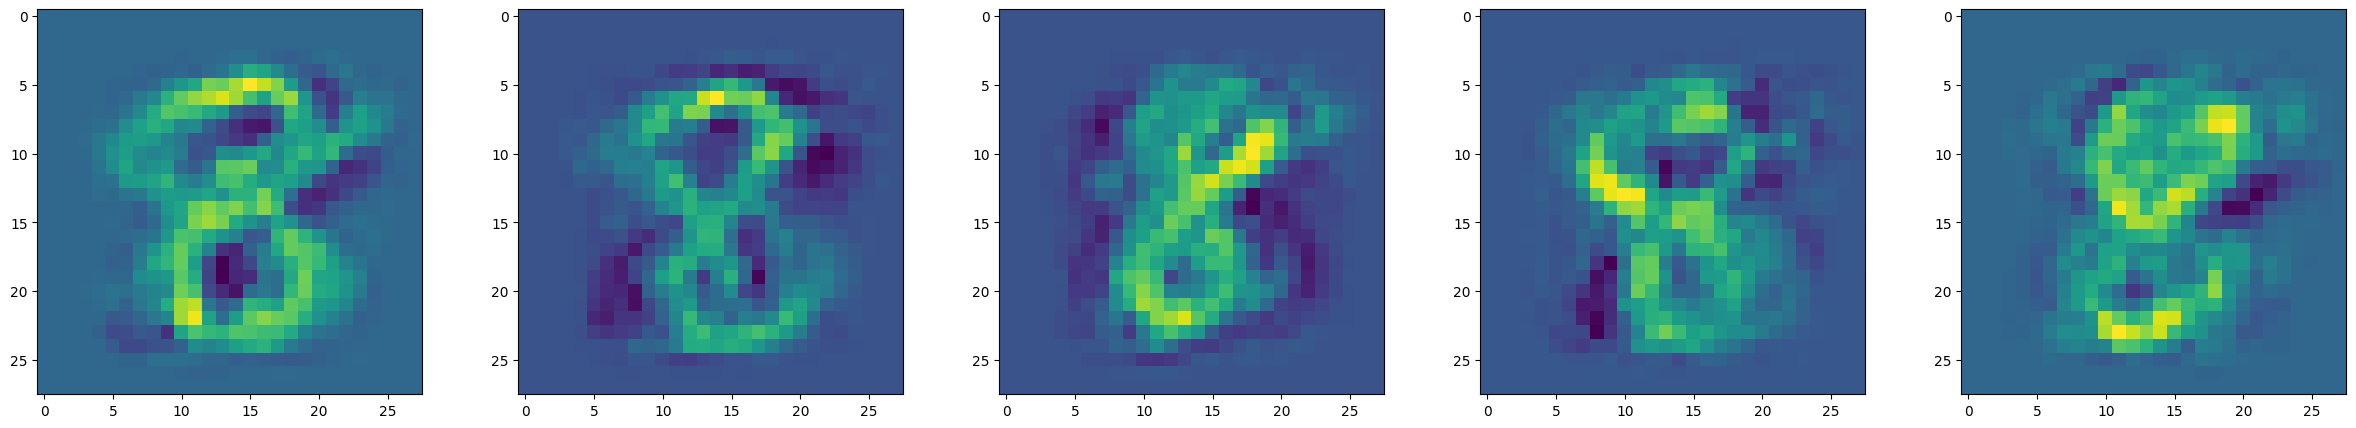

In [15]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = cov, size = 1)
    #z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


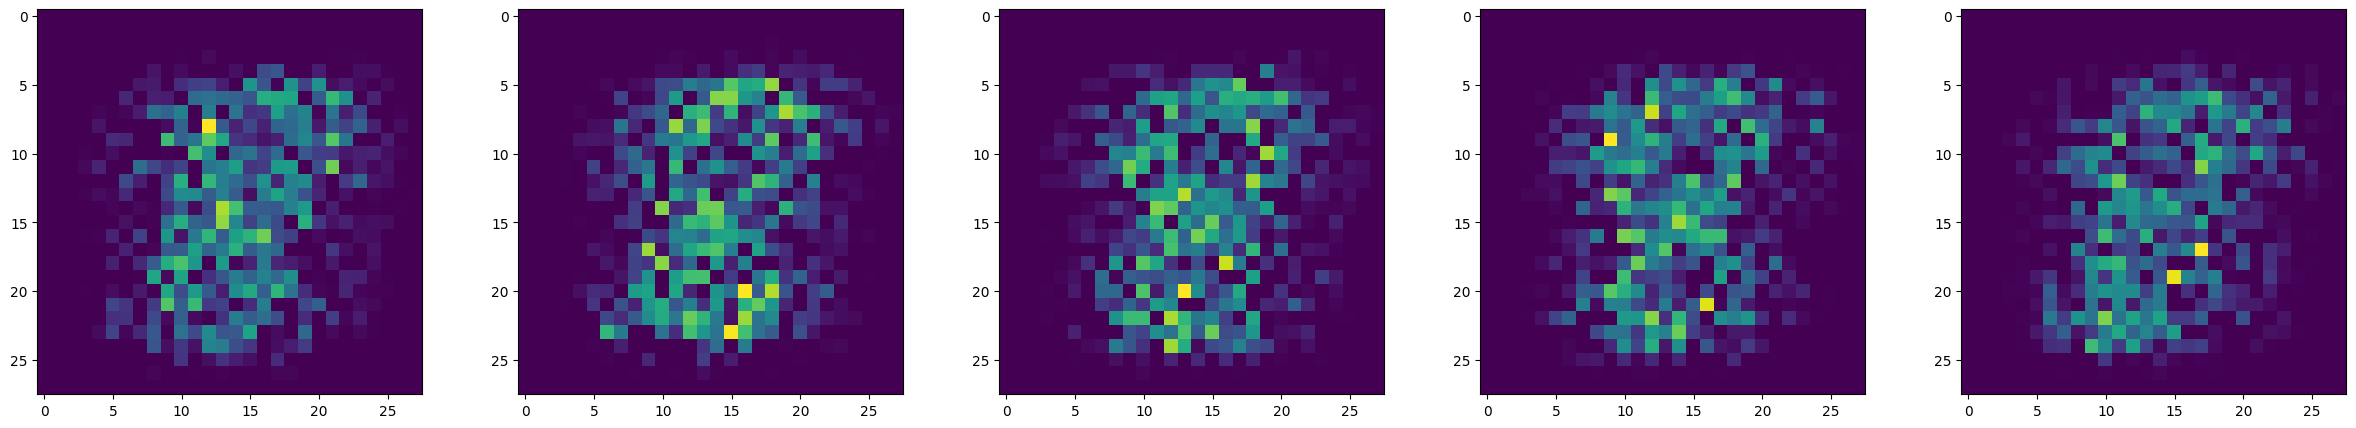

In [16]:
fig, ax = plt.subplots(1, 5, figsize= (30, 5))
cov = (X - vmu).T @ (X - vmu) / (X.shape[0] - 1)
diag = np.diagonal(cov)
cov2 = np.diag(diag)
for i in range(5):
    #np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu, cov = cov2, size = 1)
    z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))


In [17]:
# Increasing the dataset with just the mean, and seeing the covariance estimation improvement
m = 100000
Z = np.random.multivariate_normal(mean = vmu, cov = cov, size = m)
print(Z.shape)
X_inc = np.vstack((X, Z))
print(X_inc.shape)

(100000, 784)
(105851, 784)


(784,)
(784, 784)


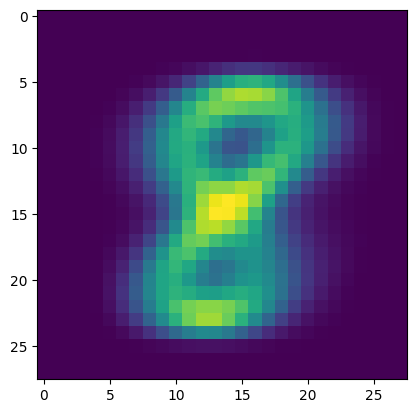

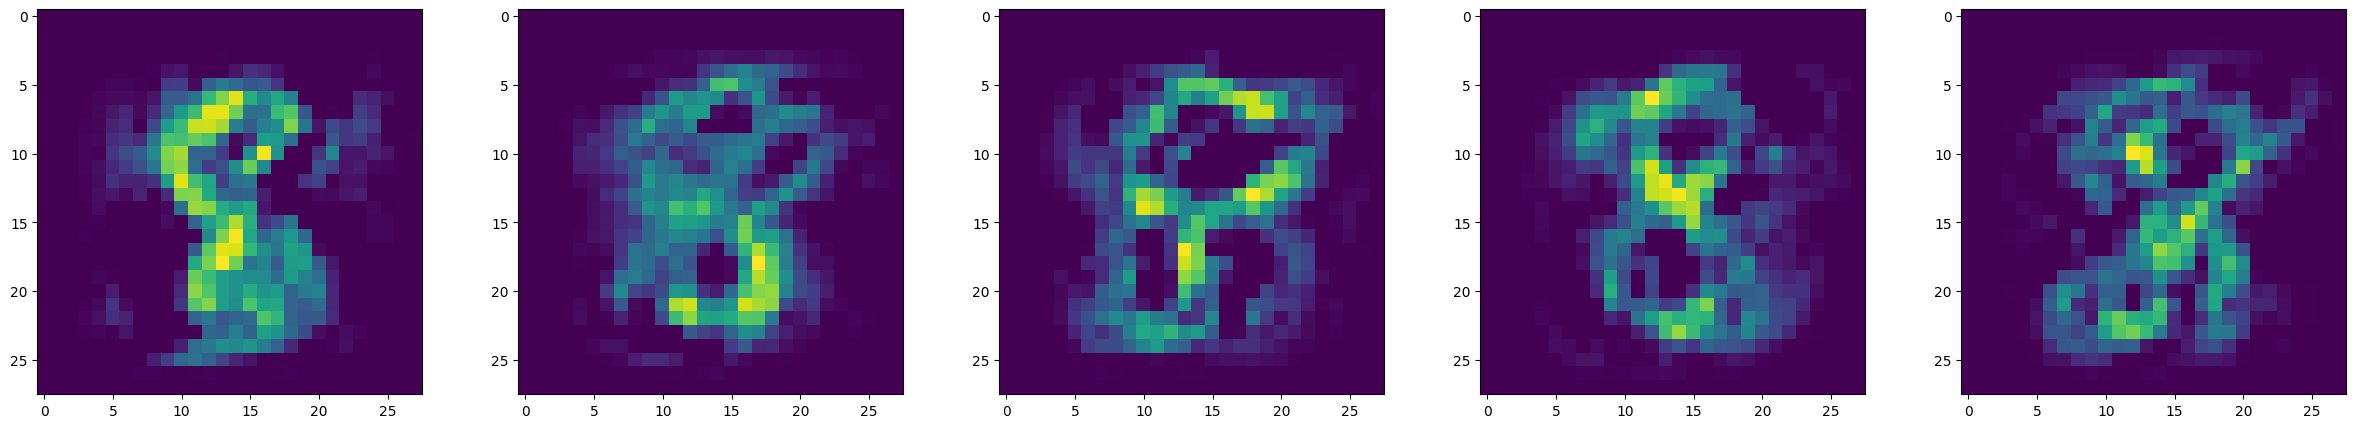

In [18]:
# Statistics
import numpy as np
vmu_inc = np.mean(X_inc, axis = 0)
print(vmu_inc.shape)
cov_inc = (X_inc - vmu_inc).T @ (X_inc  -vmu_inc)/ (X_inc.shape[0] - 1)
print(cov_inc.shape)
plt.imshow(vmu_inc.reshape(28, 28))

# Generate new samples
fig, ax = plt.subplots(1, 5, figsize= (30, 5))

for i in range(5):
    np.random.seed(i)
    z = np.random.multivariate_normal(mean = vmu_inc, cov = cov_inc, size = 1)
    z = np.maximum(z, 0)
    ax[i].imshow(z.reshape(28, 28))




In [1]:
from dataset import *
from torch.utils.data import DataLoader
m = 100
train_data = MNIST_generator(m, device ='cpu', train = True)
train_loader = DataLoader(train_data, batch_size= 32, shuffle = True)


In [2]:
train_iter = iter(train_loader)
batch = next(train_iter)
batch[0].size()

torch.Size([32, 784])

In [3]:
from model import *
model = Mnist_Model()
logits = model(batch[0])
logits.size()

torch.Size([32, 10])

In [4]:
for X, y in train_loader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([32, 784])
torch.Size([32])


In [1]:
import pandas as pd
results = pd.DataFrame(columns= ['m', 'm_estim', 'Train Loss', 'Test Loss', 'Train Accuracy', 'Test Accuracy'])
results.to_csv('results.csv', index = False)

In [2]:
from dataset import *
import matplotlib.pyplot as plt

n = 1000
m = 2000
m_estim = 1800

train_data = MNIST_generator(n, m, 'cpu', True, m_estim, estimate_cov= True)

In [3]:
X = train_data.X
y = train_data.y
print(X.shape)
print(y.shape)

(30000, 784)
(30000,)


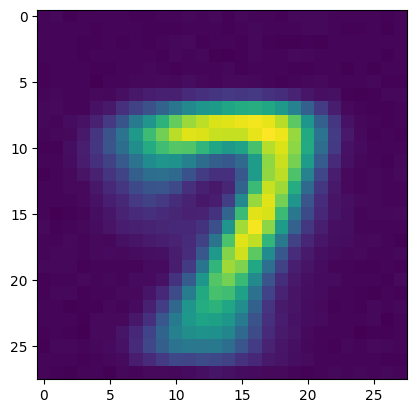

In [4]:
plt.imshow(X[25000].reshape(28, 28))

In [5]:
y[25000]

np.int64(7)

In [6]:
test_data = MNIST_generator(n, m, 'cpu', False)
X_test = test_data.X
X_test.shape

(10000, 784)

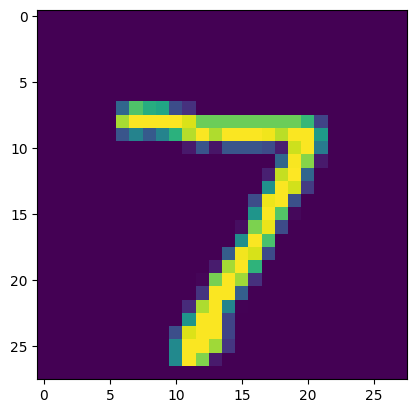

In [7]:
plt.imshow(X_test[0].reshape(28, 28))

## Plotting results on the csv file

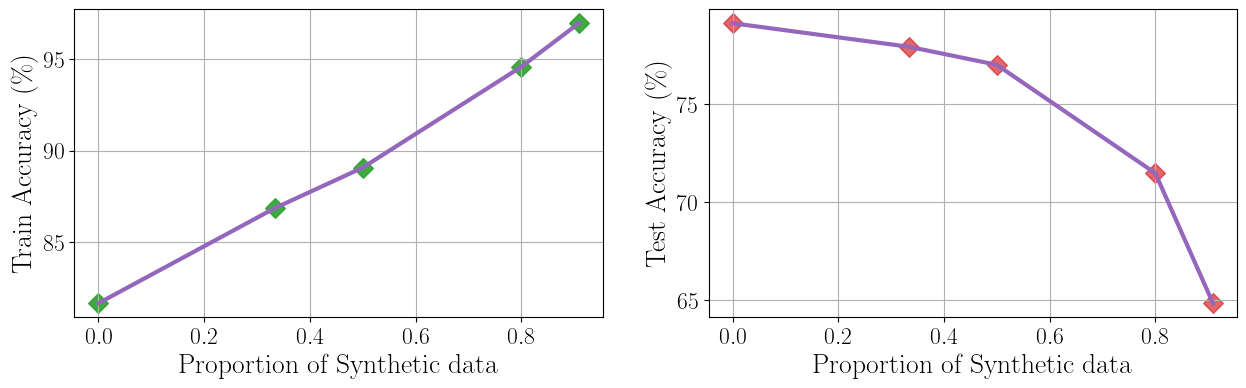

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

n = 1000
df = pd.read_csv('results_aws_n_1000.csv')
ms = df['m'].to_numpy()
pis = ms / (n + ms)
# Train accuracy evolution
train_accs = df['Train Accuracy']
test_accs = df['Test Accuracy']

fig, ax = plt.subplots(1, 2, figsize = (15, 4))
linewidth = 3
fontsize = 20
labelsize = 17
s = 100

# Train Accuracy
ax[0].plot(pis, train_accs, color = 'tab:purple', linewidth = linewidth )
ax[0].scatter(pis, train_accs, marker = 'D', color = 'tab:green', s = s, alpha = .9)
ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[0].set_ylabel('Train Accuracy (\%)', fontsize = fontsize)
ax[0].set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax[0].grid()

# Test Accuracy
ax[1].plot(pis, test_accs, color = 'tab:purple', linewidth = linewidth )
ax[1].scatter(pis, test_accs, marker = 'D', color = 'tab:red', s = s, alpha = .7)
ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[1].set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax[1].set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax[1].grid()

#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')
path = './study-plot' + f'/MNIST-n-{n}.pdf'
fig.savefig(path, bbox_inches='tight')

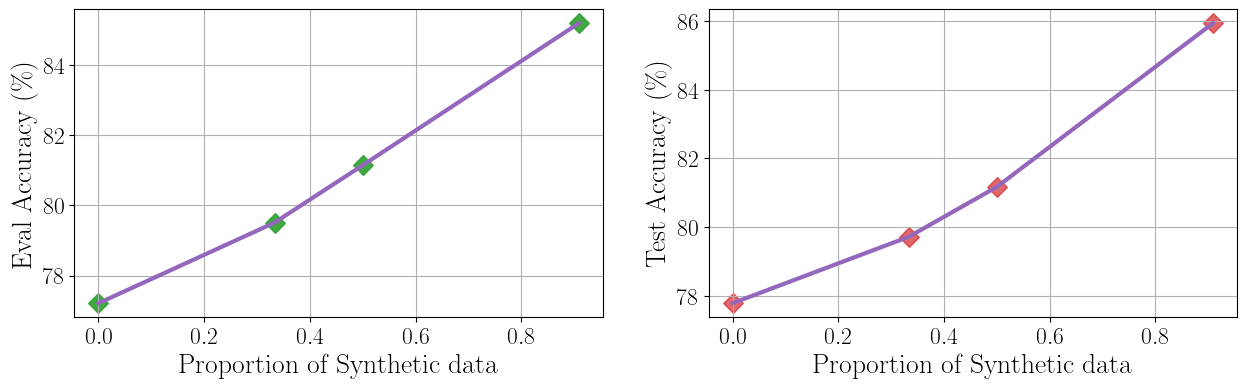

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

n = 50
df = pd.read_csv('results_mnist_n-50.csv')
ms = df['m'].to_numpy()[:-1]
pis = ms / (n + ms)
# Train accuracy evolution
train_accs = df['Train Accuracy'][:-1]
test_accs = df['Test Accuracy'][:-1]

fig, ax = plt.subplots(1, 2, figsize = (15, 4))
linewidth = 3
fontsize = 20
labelsize = 17
s = 100

# Train Accuracy
ax[0].plot(pis, train_accs, color = 'tab:purple', linewidth = linewidth )
ax[0].scatter(pis, train_accs, marker = 'D', color = 'tab:green', s = s, alpha = .9)
ax[0].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[0].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[0].set_ylabel('Eval Accuracy (\%)', fontsize = fontsize)
ax[0].set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax[0].grid()

# Test Accuracy
ax[1].plot(pis, test_accs, color = 'tab:purple', linewidth = linewidth )
ax[1].scatter(pis, test_accs, marker = 'D', color = 'tab:red', s = s, alpha = .7)
ax[1].tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax[1].tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax[1].set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax[1].set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax[1].grid()

#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')
path = './study-plot' + f'/MNIST-NN-ReLU-n-{n}.pdf'
fig.savefig(path, bbox_inches='tight')

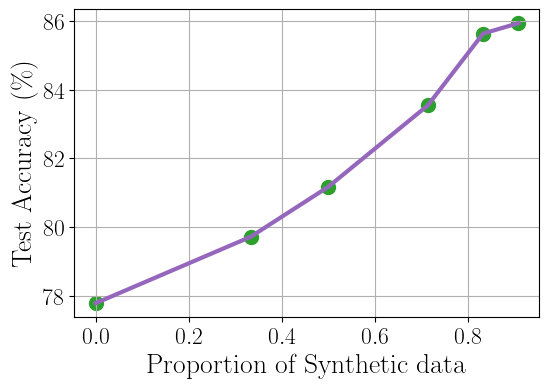

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({"text.usetex": True,"font.family": "STIXGeneral"})#,"font.sans-serif": "Helvetica",})

n = 50
df = pd.read_csv('results_mnist_n-50.csv')
ms = df['m'].to_numpy()[:-1]
pis = ms / (n + ms)
# Train accuracy evolution
test_accs = df['Test Accuracy'][:-1]

fig, ax = plt.subplots(figsize = (6, 4))
linewidth = 3
fontsize = 20
labelsize = 17
s = 100

# Test Accuracy
ax.plot(pis, test_accs, color = 'tab:purple', linewidth = linewidth )
ax.scatter(pis, test_accs, marker = 'o', color = 'tab:green', s = s, alpha = 1)
ax.tick_params(axis = 'x', which = 'both', labelsize = labelsize)
ax.tick_params(axis = 'y', which = 'both', labelsize = labelsize)
ax.set_ylabel('Test Accuracy (\%)', fontsize = fontsize)
ax.set_xlabel('Proportion of Synthetic data', fontsize = fontsize)
ax.grid()

#plt.title('MNIST Training with Mixture of Real + Synthetic data', loc = 'center')
path = './study-plot' + f'/MNIST-NN-ReLU-n-{n}.pdf'
fig.savefig(path, bbox_inches='tight')

# Generate examples of GAN vs Gaussian data

In [2]:
import numpy as np
from dataset import *
import matplotlib.pyplot as plt

## Gaussian with covariance estimation

In [9]:
# Gaussian data
m = 2000
m_estim = 0
estimate_cov = True
train_gauss = MNIST_generator(6000, m, 'cpu', True, m_estim, estimate_cov, supervision= False)

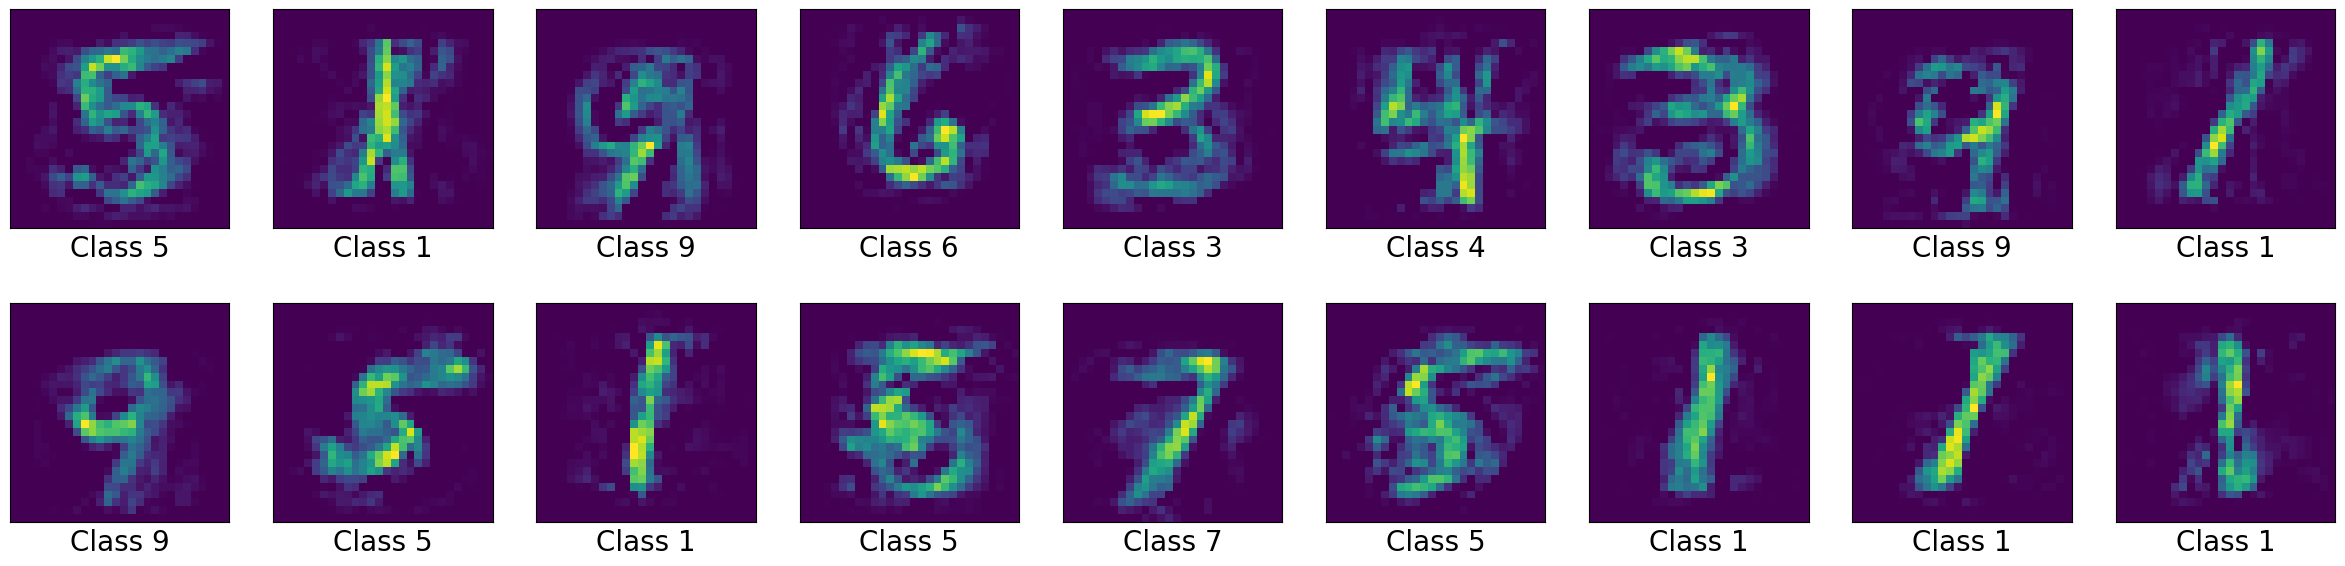

In [10]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (2, 9))
fig, ax = plt.subplots(2, 9, figsize = (30, 7))
y_s = train_gauss.y_s
l, c = idx.shape
for i in range(l):
    for j in range(c):
        im = X_s[idx[i, j]]
        #im = np.maximum(im, 0)
        ax[i, j].imshow(im.reshape(28, 28))
        ax[i, j].set_xlabel(f'Class {y_s[idx[i, j]]}', fontsize = 20)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
fig.savefig(path, bbox_inches='tight')

## Gaussian without covaraince estimation

In [11]:
# Gaussian data
m = 2000
m_estim = 0
estimate_cov = False
train_gauss = MNIST_generator(6000, m, 'cpu', True, m_estim, estimate_cov, supervision= False)

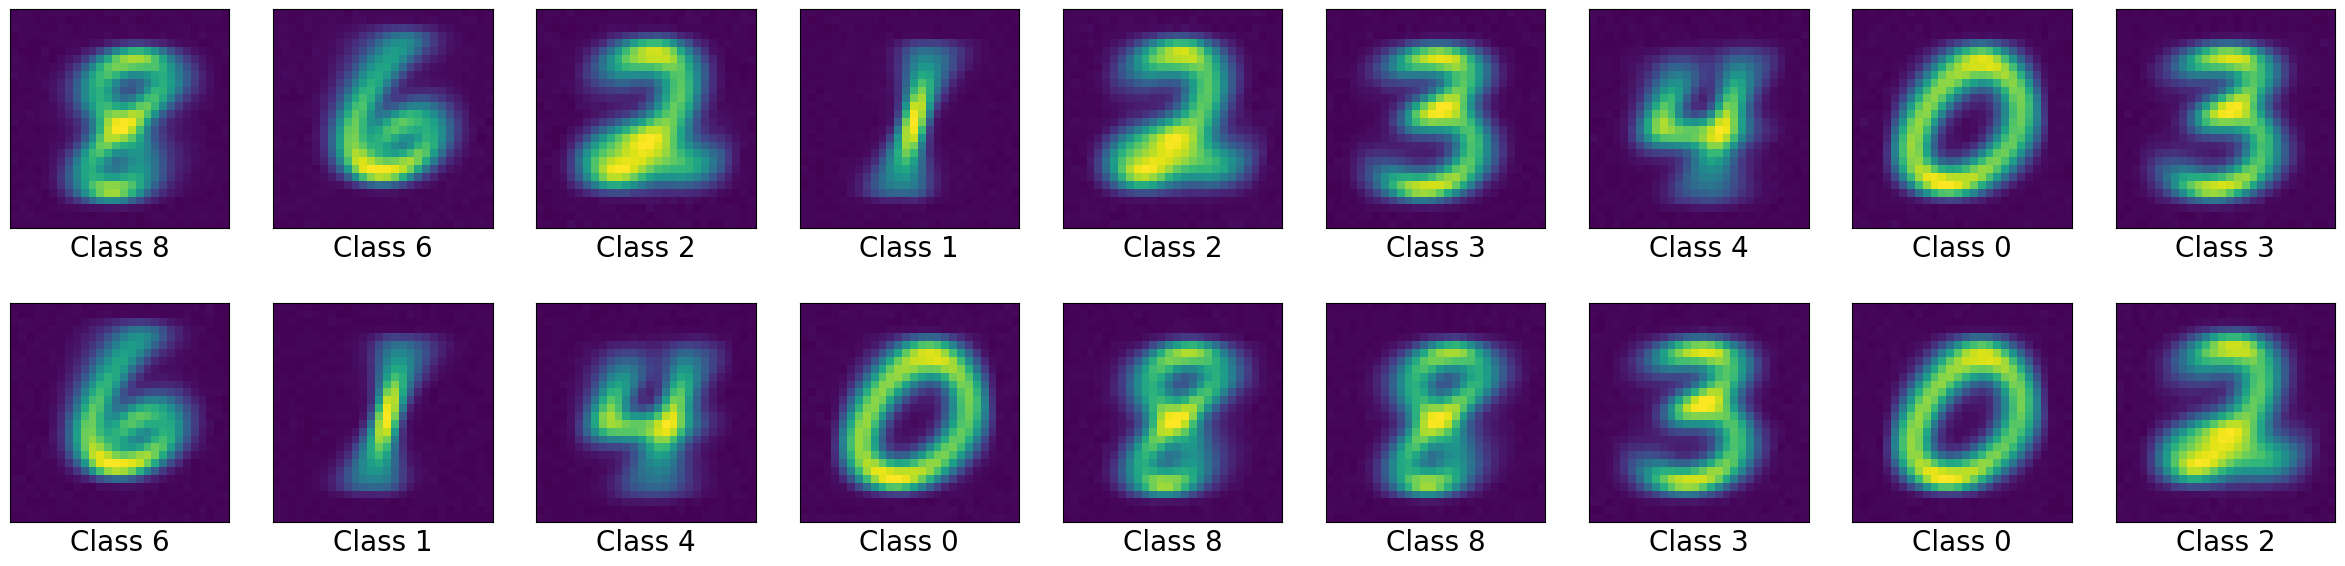

In [12]:
X_s = train_gauss.X_s
idx = np.random.randint(0, len(X_s), (2, 9))
fig, ax = plt.subplots(2, 9, figsize = (30, 7))
y_s = train_gauss.y_s
l, c = idx.shape
for i in range(l):
    for j in range(c):
        im = X_s[idx[i, j]]
        #im = np.maximum(im, 0)
        ax[i, j].imshow(im.reshape(28, 28))
        ax[i, j].set_xlabel(f'Class {y_s[idx[i, j]]}', fontsize = 20)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

path = f'./study-plot/generated-gaussian-mnist-m-{m}-m_estim-{m_estim}-estim_cov-{estimate_cov}.pdf'
fig.savefig(path, bbox_inches='tight')

## GAN

In [32]:
# GAN data
n = 6000
m = 2000
supervision = True
threshold = 2
train_gan = MNIST_GAN(n, m, 'cpu', True, supervision, threshold)

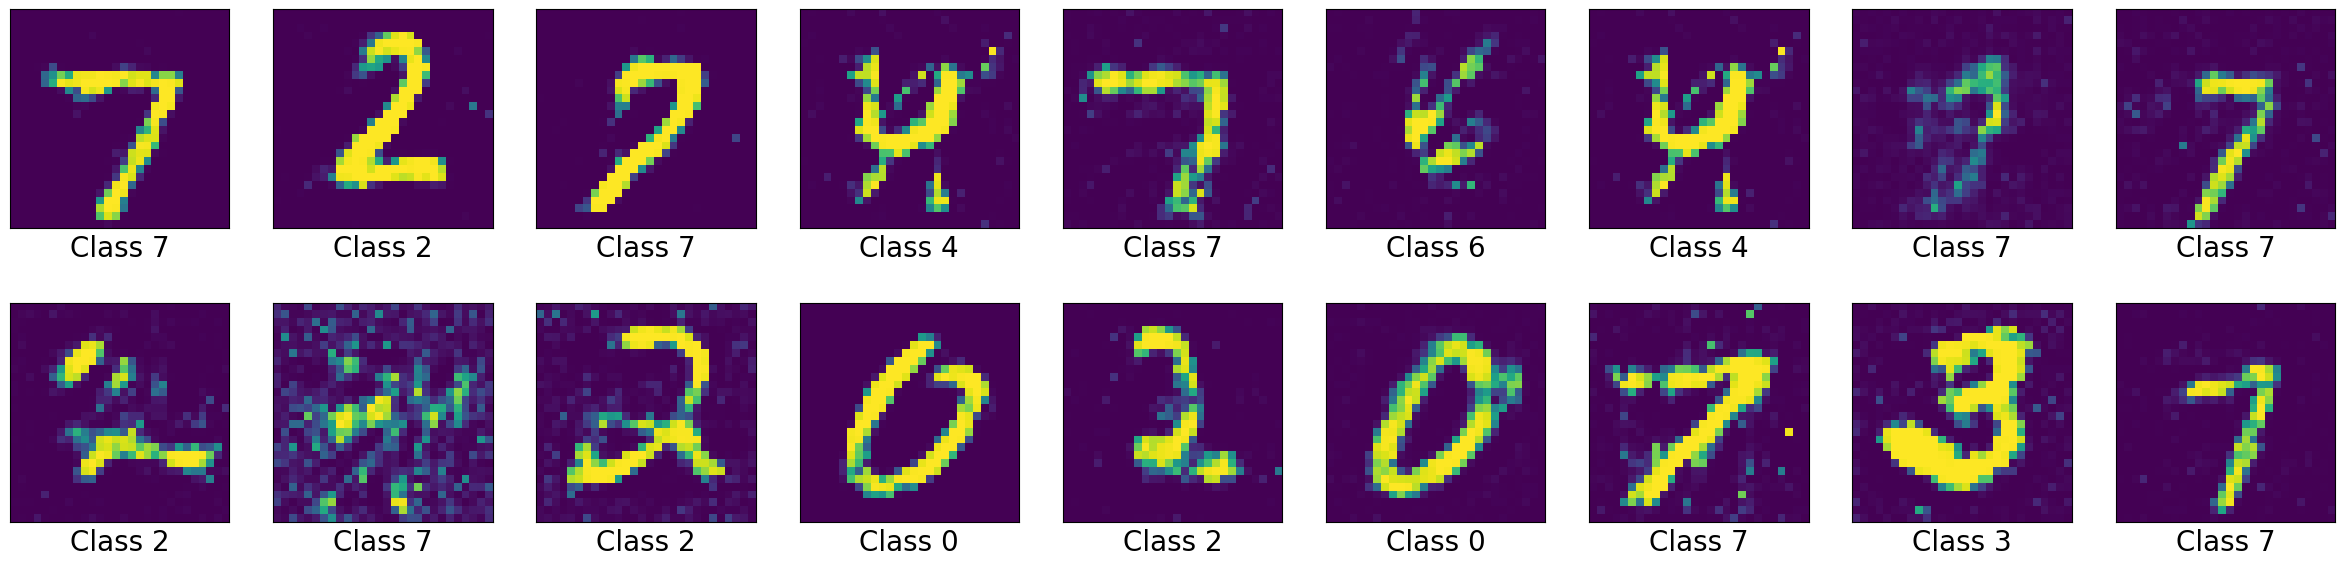

In [46]:
X_s = train_gan.X_s
idx = np.random.randint(0, len(X_s), (2, 9))
fig, ax = plt.subplots(2, 9, figsize = (30, 7))
y_s = train_gan.y_s
l, c = idx.shape
for i in range(l):
    for j in range(c):
        im = X_s[idx[i, j]]
        #im = np.maximum(im, 0)
        ax[i, j].imshow(im.reshape(28, 28))
        ax[i, j].set_xlabel(f'Class {y_s[idx[i, j]]}', fontsize = 20)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])


path = f'./study-plot/generated-gan-mnist-m-{m}-supervision-{supervision}-threshold-{threshold}.pdf'
fig.savefig(path, bbox_inches='tight')

In [30]:
len(y_s)

862